In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Objective :  To predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age.

In [4]:
#Import Dataset
df = pd.read_csv("mammographic_masses.data", na_values = "?", names = ["BIRADS_assessment", "age", "shape", "margin", "density", 
                                                                       "severity"])
print(df.shape)

(961, 6)


In [5]:
#Display first 5 rows in the data
df.head()

,BIRADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [6]:
#Data info to get an overview of the dtypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BIRADS_assessment  959 non-null    float64
 1   age                956 non-null    float64
 2   shape              930 non-null    float64
 3   margin             913 non-null    float64
 4   density            885 non-null    float64
 5   severity           961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [7]:
#Print unique values in each column
for col in df.columns:
    print(col,df[col].unique())

BIRADS_assessment [ 5.  4.  3. nan  2. 55.  0.  6.]
age [67. 43. 58. 28. 74. 65. 70. 42. 57. 60. 76. 64. 36. 54. 52. 59. 40. 66.
 56. 75. 63. 45. 55. 46. 39. 81. 77. 48. 78. 50. 61. 62. 44. 23. 80. 53.
 49. 51. 25. 72. 73. 68. 33. 47. 29. 34. 71. 84. 24. 86. 41. 87. 21. 19.
 35. 37. 79. 85. 69. 38. 32. 27. 83. 88. 26. 31. nan 18. 82. 93. 30. 22.
 96. 20.]
shape [ 3.  1.  4. nan  2.]
margin [ 5.  1. nan  4.  3.  2.]
density [ 3. nan  1.  2.  4.]
severity [1 0]


In [8]:
#BIRADS_assessment any values greater than 5 is considered to be Malignant
print("BIRADS_assessment>5: ",df.BIRADS_assessment[df.BIRADS_assessment > 5].count())
for val in df.BIRADS_assessment[df.BIRADS_assessment > 5]:
    df.BIRADS_assessment.replace(val,5,inplace=True)
print("After replacing BIRADS_assessment>5 with 5: ",df.BIRADS_assessment[df.BIRADS_assessment > 5].count())

BIRADS_assessment>5:  12
After replacing BIRADS_assessment>5 with 5:  0


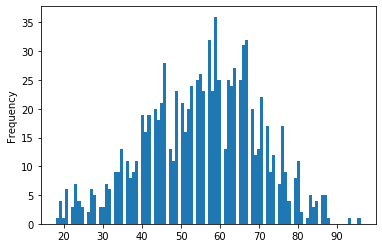

In [9]:
#Histogram for Age column
df['age'].plot(kind='hist',bins = 100)

In [10]:
#Binning of Age feature
df['age_bins'] = pd.cut(x=df['age'],bins = [10,19,29,39,49,59,69,79,89,99], labels = ['10s','20s','30s','40s','50s','60s',
                                                                                     '70s','80s','90s'])
df['age_bins'].value_counts()

50s    246
60s    234
40s    188
70s    118
30s     86
20s     40
80s     37
10s      5
90s      2
Name: age_bins, dtype: int64

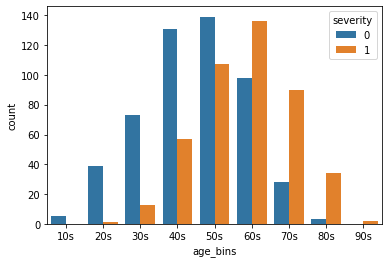

In [11]:
#Exploratory data analysis of Age after binning
#Age groups 40,50,60 and 70 are more prone to Breast Cancer
sns.countplot(x="age_bins",hue="severity", data=df)

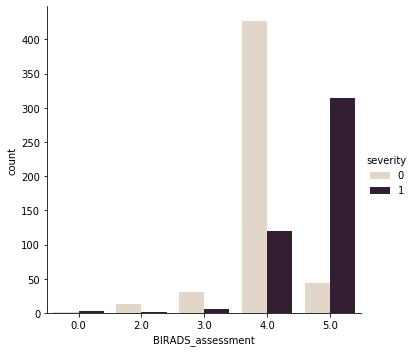

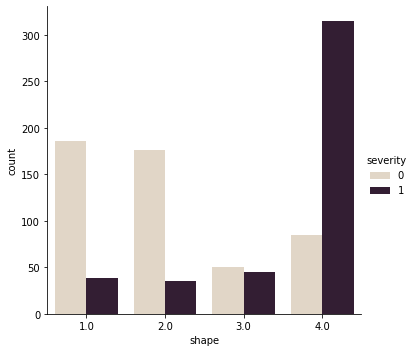

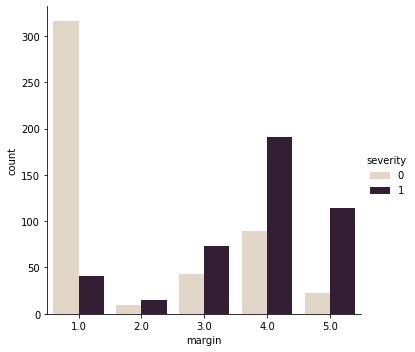

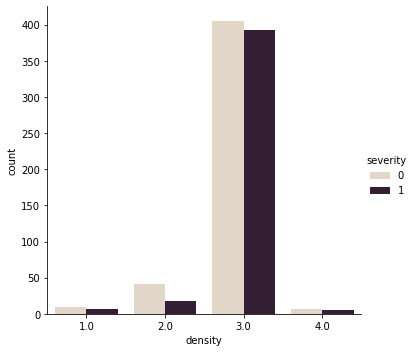

In [12]:
#Analysing features other than Age with respect to Severity
numeric_vals = df.select_dtypes(include=['float64']).columns
for col in numeric_vals:
    if col != 'age':
        sns.catplot(x=col, kind="count",hue="severity", palette="ch:.25", data=df)
    

## From above Exploratory Data Analysis we can infer that : Severity is high in patients within age groups of 40, 50, 60, 70 with tumor with irregular shape, illdefined margin and low density 

#  Data Cleaning & Pre-processing

In [13]:
#Data Cleaning
#Check for missing values
data = df.copy()
print(data.shape)
data.isna().sum()

(961, 7)


BIRADS_assessment     2
age                   5
shape                31
margin               48
density              76
severity              0
age_bins              5
dtype: int64

In [14]:
data.describe()

,BIRADS_assessment,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.284672,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.686345,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [15]:
#Encode age_bins to numeric values for further usage in fitting models
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data['age_bins_dummies'] = LabelEncoder().fit_transform(data['age_bins'].astype(str))
data.drop(['age_bins'],axis = 1,inplace=True)
data['age_bins_dummies'].head(10)

0    5
1    3
2    4
3    1
4    6
5    5
6    6
7    3
8    4
9    5
Name: age_bins_dummies, dtype: int32

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BIRADS_assessment  959 non-null    float64
 1   age                956 non-null    float64
 2   shape              930 non-null    float64
 3   margin             913 non-null    float64
 4   density            885 non-null    float64
 5   severity           961 non-null    int64  
 6   age_bins_dummies   961 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 48.9 KB


In [17]:
data.drop(['age_bins_dummies'],axis = 1, inplace=True)

In [18]:
#Drop null values with age as null 
data.dropna(inplace = True)

In [19]:
#After removing null values
print(data.shape)
data.isna().sum()

(830, 6)


BIRADS_assessment    0
age                  0
shape                0
margin               0
density              0
severity             0
dtype: int64

In [20]:
#Test and Train split
X = data.drop(['severity'],axis = 1)
y = data['severity']
print(len(X),len(y))

830 830


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [22]:
X_train.columns

Index(['BIRADS_assessment', 'age', 'shape', 'margin', 'density'], dtype='object')

In [23]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(581, 5) (581,)
(249, 5) (249,)


# MODELING

## Random Forest

In [24]:
#Import Random Forest Classifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Create RandomForestClassifier object
rf = RandomForestClassifier()

# train the model
rf.fit(X_train, y_train)

# get predictions
y_hat = rf.predict(X_test)

In [26]:
#Import metrics from sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       124
           1       0.83      0.82      0.83       125

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.83      0.83      0.83       249



In [28]:
print('Train Accuracy:', accuracy_score(y_train, rf.predict(X_train)).round(4) * 100)
print('Test Accuracy:', accuracy_score(y_test, y_hat).round(4) * 100)

Train Accuracy: 93.97999999999999
Test Accuracy: 82.73


In [29]:
#Confusion Matric for Random Forest Classifier 
confusion_matrix(y_test, y_hat)

array([[103,  21],
       [ 22, 103]], dtype=int64)

## Naive Bayes

In [30]:
#Import Naive Bayes Classifier model from sklearn
from sklearn.naive_bayes import GaussianNB

In [31]:
#Create Naive Bayes Classifier object
nb = GaussianNB()

# train the model
nb.fit(X_train, y_train)

#get predictions
y_hat = nb.predict(X_test)

In [32]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       124
           1       0.82      0.89      0.85       125

    accuracy                           0.84       249
   macro avg       0.85      0.84      0.84       249
weighted avg       0.85      0.84      0.84       249



In [33]:
print('Train Accuracy:', accuracy_score(y_train, nb.predict(X_train)).round(4) * 100)
print('Test Accuracy:', accuracy_score(y_test, y_hat).round(4) * 100)

Train Accuracy: 81.41000000000001
Test Accuracy: 84.34


In [34]:
#Confusion Matric for Naive Bayes Classifier 
confusion_matrix(y_test, y_hat)

array([[ 99,  25],
       [ 14, 111]], dtype=int64)

# Compare

In [35]:
# Comparing the results obtained from different models with default parameters
df_compare = pd.DataFrame({'Model': [type(nb).__name__, type(rf).__name__],
                           'Train_Accuracy': [nb.score(X_train, y_train).round(4) * 100,  rf.score(X_train, y_train).round(4) * 100],
                           'Test_Accuracy': [nb.score(X_test, y_test).round(4) * 100, rf.score(X_test, y_test).round(4) * 100]})

In [36]:
df_compare

,Model,Train_Accuracy,Test_Accuracy
0,GaussianNB,81.41,84.34
1,RandomForestClassifier,93.98,82.73


In [37]:
# saving model as a pickle
import pickle
pickle.dump(nb,open("mammographic_mass_severity_prediction.sav", "wb"))

In [39]:

model = pickle.load(open("mammographic_mass_severity_prediction.sav", "rb"))
model
prediction = model.predict([[5, 60, 4, 4, 3]])
prediction

array([1], dtype=int64)

In [41]:
pickle.dump(nb, open('model.pkl','wb'))

In [43]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[5, 60, 4, 4, 3]]))

[1]
